In [15]:
import serial

# Konfiguration
serial_port = '/dev/ttyUSB0'  # Passe an, falls nötig
baud_rate = 2000000
num_samples = 441000

# Serielle Verbindung öffnen
ser = serial.Serial(serial_port, baud_rate, timeout=1)

# Speicher für die Samples
right_channel = []
left_channel = []

print(f"Beginne mit dem Einlesen von {num_samples} Stereo-Samples...")

while len(right_channel) < num_samples:
    line = ser.readline().decode('utf-8', errors='ignore').strip()
    if ',' in line:
        try:
            right_str, left_str = line.split(',')
            right_val = int(right_str.strip())
            left_val = int(left_str.strip())
            right_channel.append(right_val)
            left_channel.append(left_val)
        except ValueError:
            continue  # Zeile überspringen, wenn nicht korrekt formatiert

ser.close()
print(f"{num_samples} Samples erfolgreich eingelesen.")

# Beispiel: Ausgabe der ersten 5 Samples
for i in range(5):
    print(f"Sample {i+1}: Rechts = {right_channel[i]}, Links = {left_channel[i]}")


Beginne mit dem Einlesen von 441000 Stereo-Samples...
441000 Samples erfolgreich eingelesen.
Sample 1: Rechts = 1, Links = -28
Sample 2: Rechts = -34, Links = -24
Sample 3: Rechts = -39, Links = -31
Sample 4: Rechts = -44, Links = -30
Sample 5: Rechts = -44, Links = -26


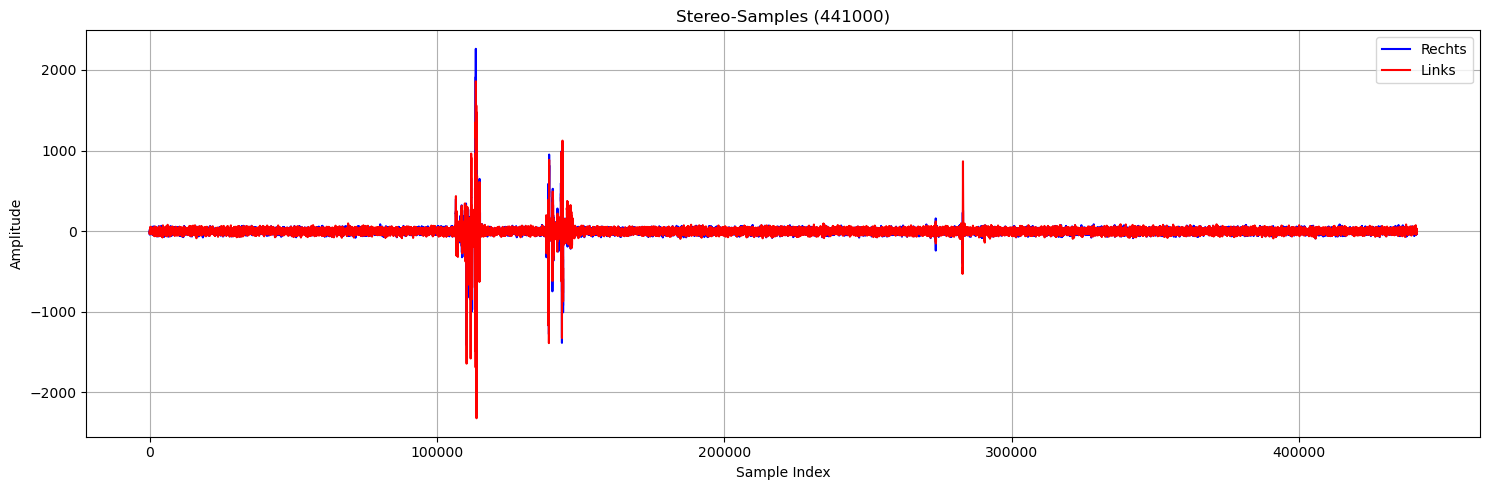

In [17]:
import matplotlib.pyplot as plt

# Plot der rechten und linken Kanäle
plt.figure(figsize=(15, 5))

# Rechter Kanal
plt.plot(right_channel, label='Rechts', color='blue')

# Linker Kanal
plt.plot(left_channel, label='Links', color='red')

plt.title('Stereo-Samples (441000)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()